In [1]:
from keras import layers
from keras import models

生成模型

In [2]:
from keras.applications import VGG16
model_vgg16 = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(150,150,3))
model_vgg16.trainable=False

In [3]:
model1 = models.Sequential()
model1.add(model_vgg16)
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(256,activation = 'relu'))
model1.add(layers.Dense(10,activation='softmax'))
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropout)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'D:/detection_project/image_database/trainset'
test_dir = 'D:/detection_project/image_database/testset'
validation_dir = 'D:/detection_project/image_database/validationset'
train_datagen1 = ImageDataGenerator(
                                    rescale = 1./255,
                                    rotation_range= 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest',
                                   )
test_datagen1 = ImageDataGenerator(rescale = 1./255)
train_generator1 = train_datagen1.flow_from_directory(train_dir,
                                                      target_size = (150,150),
                                                      batch_size = 24,
                                                      class_mode = 'categorical',#采用one-hot标签格式
                                                      classes=['跑步机', '登山机', '椭圆机', '立式健身车',
                 '反向直臂夹胸器', '坐姿肩部推举器', '肩部平举器', '坐姿推胸器',
                 '直臂夹胸器', '牧师凳弯举器'])#十种数字图片所在文件夹的名字
validation_generator1 = test_datagen1.flow_from_directory(validation_dir,
                                                          target_size = (150,150),
                                                          batch_size = 24,
                                                          class_mode = 'categorical')


Found 2893 images belonging to 10 classes.
Found 1488 images belonging to 10 classes.


编译

In [5]:
from keras import optimizers
model1.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['acc'])

训练

In [6]:
history1 = model1.fit(train_generator1,
                              steps_per_epoch=120,
                              epochs=30,
                              validation_data = validation_generator1,
                              validation_steps= 60)

Epoch 1/30
120/120 [==============================] - 185s 2s/step - loss: 1.9619 - acc: 0.3158 - val_loss: 3.0529 - val_acc: 0.0514
Epoch 2/30
120/120 [==============================] - 202s 2s/step - loss: 1.6144 - acc: 0.4252 - val_loss: 3.8543 - val_acc: 0.0368
Epoch 3/30
120/120 [==============================] - 201s 2s/step - loss: 1.4417 - acc: 0.4887 - val_loss: 4.3016 - val_acc: 0.0257
Epoch 4/30
120/120 [==============================] - 191s 2s/step - loss: 1.4149 - acc: 0.4970 - val_loss: 4.7172 - val_acc: 0.0264
Epoch 5/30
120/120 [==============================] - 190s 2s/step - loss: 1.3464 - acc: 0.5180 - val_loss: 4.8231 - val_acc: 0.0375
Epoch 6/30
120/120 [==============================] - 189s 2s/step - loss: 1.3320 - acc: 0.5218 - val_loss: 4.9738 - val_acc: 0.0306
Epoch 7/30
120/120 [==============================] - 197s 2s/step - loss: 1.2694 - acc: 0.5455 - val_loss: 5.1945 - val_acc: 0.0285
Epoch 8/30
120/120 [==============================] - 189s 2s/step - 

In [7]:
model1.save('model1_clsf_10.h5')

显示结果

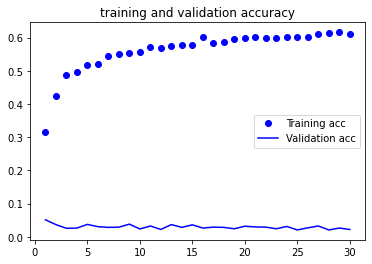

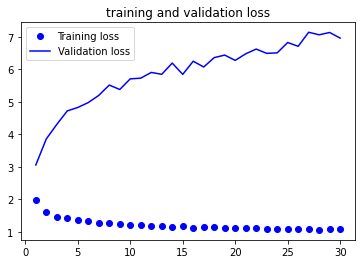

In [8]:
import matplotlib.pyplot as plt
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs1 = range(1,len(acc1)+1)

plt.plot(epochs1,acc1,'bo',label = 'Training acc')
plt.plot(epochs1,val_acc1,'b',label = 'Validation acc')
plt.title("training and validation accuracy")
plt.legend()


plt.figure()

plt.plot(epochs1,loss1,'bo',label = 'Training loss')
plt.plot(epochs1,val_loss1,'b',label = 'Validation loss')
plt.title("training and validation loss")
plt.legend()

测试集准确率

In [10]:
test_generator1 = test_datagen1.flow_from_directory(test_dir,
                                                          target_size = (150,150),
                                                          batch_size = 24,
                                                          class_mode = 'categorical')
test_loss,test_acc = model1.evaluate(test_generator1,steps=50)
print('test acc',test_acc)

Found 1521 images belonging to 10 classes.
50/50 [==============================] - 51s 1s/step - loss: 7.1039 - acc: 0.0158
test acc 0.015833333134651184
